In [1]:
import os
os.chdir('..')
from notebooks import config
import geopandas as gpd
import numpy as np
from utils.geotif_io import readTiff, writeTiff
from utils.imgShow import imgShow
import matplotlib.pyplot as plt
from utils.transform_xy import coor2coor, imagexy2geo, geo2imagexy


In [2]:
path_vector = config.root_proj + '/data/tibet/tibet_tiles_vec/tibet_tiles.gpkg'
tiles_gdf = gpd.read_file(path_vector)
tiles_gdf.head()


/home/yons/miniconda3/envs/venv-luo/lib/python3.6/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


,area,proj,tile_id,geometry
0,10852.910371,EPSG: 32646,001,"MULTIPOLYGON (((91.60292 25.97742, 91.60292 26..."
1,10856.066053,EPSG: 32646,002,"MULTIPOLYGON (((92.59904 25.97742, 92.59904 26..."
2,10853.222782,EPSG: 32647,003,"MULTIPOLYGON (((97.64819 25.97742, 97.64819 26..."
3,10856.025776,EPSG: 32647,004,"MULTIPOLYGON (((98.64468 25.97742, 98.64468 26..."
4,10850.995157,EPSG: 32647,005,"MULTIPOLYGON (((99.64905 25.97742, 99.64905 26..."


## Remove the buffer region of the tile image

In [35]:
tile_id = '201'
# for id in range(50):
# tile_id = str(id+1).rjust(3,'0')
print('tile_'+tile_id)
path_wat = config.root_tb_data + '/tibet-202008/s1_water_1/tibet_s1_202008_tile_' + tile_id + '_water.tif'
path_wat_subs = config.root_tb_data + '/tibet-202008/s1_water_1/tibet_s1_202008_tile_' + tile_id + '_water_subs.tif'
img, img_info = readTiff(path_in=path_wat)
idx, = np.where(tiles_gdf['tile_id'].values == tile_id)
tile_region = tiles_gdf.loc[int(idx)]['geometry'].bounds
left_up = [tile_region[0],tile_region[3]]
right_down = [tile_region[2],tile_region[1]]
extent = str(left_up[0])+' '+str(left_up[1])+' '+str(right_down[0])+' '+str(right_down[1]) 
command = 'gdal_translate -projwin ' + extent +  ' ' + path_wat + ' ' + path_wat_subs
print(os.popen(command).read())



tile_201
Input file size is 14765, 12694
0...10...20...30...40...50...60...70...80...90...100 - done.



## Check subseting of the image

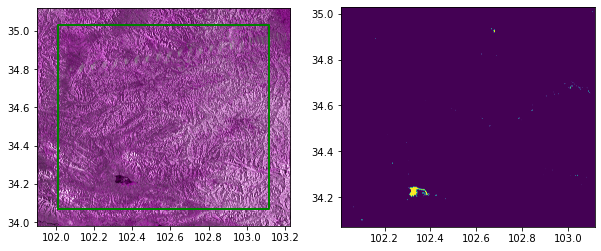

In [36]:
##### check
## -- data path
tile_id = '201'
path_s1_img = config.root_tb_data + '/tibet-202008/s1_ascend/tibet_s1as_202008_tile_' + tile_id + '.tif'
path_wat = config.root_tb_data + '/tibet-202008/s1_water_1/tibet_s1_202008_tile_' + tile_id + '_water_subs.tif'
## -- data read
s1_img_tile, s1_img_tile_info = readTiff(path_in = path_s1_img)
s1_tile_wat, s1_tile_wat_info = readTiff(path_in = path_wat)
## -- get tile region and outline
idx, = np.where(tiles_gdf['tile_id'].values == tile_id)
tile_region = tiles_gdf.loc[int(idx)]['geometry'].bounds
outline_x = [tile_region[0],tile_region[2], tile_region[2], tile_region[0],tile_region[0]]  
outline_y = [tile_region[1], tile_region[1], tile_region[3], tile_region[3], tile_region[1]]

### show
plt.figure(figsize=(10,5))
## plot s1 image
plt.subplot(1,2,1)
imgShow(s1_img_tile, extent=s1_img_tile_info['geoextent'], color_bands=(0,1,0), clip_percent=2)
plt.plot(outline_x, outline_y, color='g', linewidth=2)
## plot subsetted water map
plt.subplot(1,2,2)
imgShow(s1_tile_wat, extent=s1_tile_wat_info['geoextent'], color_bands=(0,1,0), clip_percent=2)



## Mosaic of the surface water maps

In [12]:
files = [
        config.root_tb_data + '/tibet-202008/s1_water_1/tibet_s1_202008_tile_100_water_subs.tif', 
        config.root_tb_data + '/tibet-202008/s1_water_1/tibet_s1_202008_tile_101_water_subs.tif', 
        config.root_tb_data + '/tibet-202008/s1_water_1/tibet_s1_202008_tile_102_water_subs.tif', 
        ]

files_string = " ".join(files)
# print(files_string)
## excute
command = 'gdal_merge.py -o /myDrive/tibet-water/tibet-202008/s1_water_1/tibet_tiles_water_mosaic.tif -init 0 ' + files_string
print(os.popen(command).read())



0...10...20...30...40...50...60...70...80...90...100 - done.



In [13]:
path_water_mosaic = config.root_tb_data + '/tibet-202008/s1_water_1/tibet_tiles_water_mosaic.tif'
wat_map_mosaic, wat_map_mosaic_info = readTiff(path_in = path_water_mosaic)


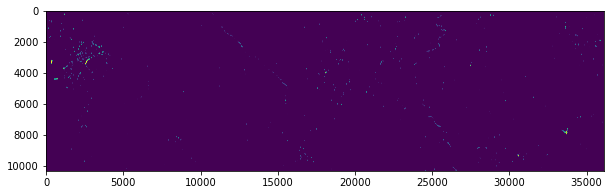

In [14]:
plt.figure(figsize=(10,5))
imgShow(wat_map_mosaic, color_bands=(0,1,0), clip_percent=2)
